# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Long Homework #3
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, April 14th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. In this long homework, we will lead you through the process of model building in simulated real-life conditions. 

In the dataset called "sample_reviews", you'll find a fairly representative selection of Yelp reviews for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. The goal in this assignment is to build a model to help a machine classify any given restaurant (or qualities of a restaurant) as "good" or "bad" given Yelp reviews. 

Problem #1 is atypical as it does not involve any programming or (necessarily) difficult mathematics/statistics, however, answering these questions *seriously* will give you a idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model in Problem #2, which is much more technically involved.


## Problem #1: Understanding Yelp Review Data As a Human

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

- If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problemmatic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.


- For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
  
- Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 


- Identify all the ways in which the task in bullet #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).


- Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review. (You are welcome to use our schema in Problem #2 to help you do this).

## Problem #2: Modeling Your Understanding

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone build for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to Part A and B:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.
  7. (only relevant

II. Relevant (possibly) to Extra Credit:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":
<img src="data/restuarant_model.pdf">

***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*

### Part A: Modeling

When the value in "count" is low, the "mean" value can be very skewed (refer to your answers for Problem #1 to see why this is a problem if we are interested in summarizing the reviewer's opinion on each aspect of a restaurant).

Following the [SAT prep school example discussed in lab](https://am207.github.io/2017/wiki/gelmanschoolstheory.html) (and using your answers for Problem #1), set up a Bayesian model for a reviewer $j$'s opinion of restaurant $k$'s food and service, separately. That is, you will have a model for each restaurant and each aspect (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** what quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?

### Part B: Analysis for Each restaurant

Use your model to produce estimates for $\theta_{jk}$'s. Pick a few restaurants, for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant. 

For the same restaurants, for each aspect, generate shrinkage plots as follows:

<img src="data/shrinkage.png">

The $x$-axis is the posterior means, the $y$-axis is classification probability (1-cdf) or fraction of predictive samples. The colored lines are error bars. (The code to generate this plot is included in this notebook.)

Use these plots to discuss the statistical benefits of modeling each reviewer's opinion as you did in Part A, rather than approximating the reviewer opinion with the value in "mean".

### Part C: Analysis Across Restaurants

Aggregate, in a simple but reasonable way, the reviewer's opinions to given a pair of overall scores for each restaurant, one for food and one for service. Rank the restaurants by food score and then by service score. Discuss the statistical weakness of ranking by these scores.

(**Hint:** what is statistically problemmatic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? You've see this question addressed a number of times in previous homeworks, e.g. Homework #7 and Homework #6. This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)

### Extra Credit:

Propose a model, that addresses the weakness of your approach in Part C, for the overall quality of food and service for each restaurant given the $\theta$'s. Combine your model for the overall quality with your model for the $\theta$'s. Use this combined model to estimate the overall quality of food and service for each restaurant.

(**Hint:** Homework #7 is a good reference for building your model for the overall quality of food and service of these restaurants. Specifically, thinking about pooling.)


**TF Solutions**

So two problems with turning reviews into a overall score for food or service for a restaurant:

1. the sentences are mixed: one sentence will be about food and the next about service and the third about food again etc. So you can't just give a score to paragraphs of text. I.e. you need to do some kind of sentence level analysis.

2. but then you need to combine all the sentences into one overall opinion for food etc. So maybe you average all the sentiment scores for each sentence on food, call this average $\bar{y}$. Then the problem is that reviews with very few sentences will have a very skewed $\bar{y}$. 

So we use the school model to "pool" over the different reviews for the same restaurant and on the same topic.

So, $\bar{y}$ from the school example is our mean sentiment score, in the 'mean' column. Since $\bar{y}$ is a sample mean, it makes sense to say that it's normally distributed. But note that the std of this distribution represents the SE of $\bar{y}$, unfortunately, the 'var' column is the variance of $y$ not $\bar{y}$. So you just need to divide the 'var' column by the 'count' column.

In [1]:
import itertools
import pymc
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.special import erf
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

prob = lambda mu, vari, num: .5 * (1 - erf((0.5- mu) / np.sqrt(2 * vari/float(num))))


def prob_shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me2, te2, c in data:
            color = next(palette)
            noise = 0.001 * np.random.randn()
            noise2 = 0.001 * np.random.randn()
            if me2 == 0:
                me2 = 4
            p = prob(m, me2, 1.)
            peb = prob(t, te2, 1.)
            plt.plot([m, t],[p, peb],'o-', color=color, lw=1)
            plt.errorbar([m, t],[p + noise, peb + noise2], xerr=[np.sqrt(me2), np.sqrt(te2)], color=color, lw=1)
        ax = plt.gca()
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
    return ax


def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)
    
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me2, te2, c in data:
            color=next(palette)
            noise=0.04*np.random.randn()
            noise2=0.04*np.random.randn()
            plt.plot([m,t],[noise,1+noise2],'o-', color=color, lw=1)
            if me2==0:
                me2=4
            plt.errorbar([m,t],[noise,1+noise2], xerr=[np.sqrt(me2), np.sqrt(te2)], color=color,  lw=1)
        plt.yticks([])
        plt.xlim([0,1])
        sns.despine(offset=-2, trim=True, left=True)
    return plt.gca()

---

## Read data

In [29]:
df = pd.read_csv('data/dftouse.csv')
df.head()

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
4,--2NT40xmHh9oBLumzdjhA,0,4ZZab5hinFzHtj3sE8vQWg,5,0.764218,0.601008,0.337710,2,4.181818,0.026742


--- 
## Pick the first restaurant, get all the reviews for food

In [30]:
resturant_food = df[(df['rid'] == 'VgLiSW1iGkpzIEXOgvUBEw') & (df['topic'] == 0)]
resturant_service = df[(df['rid'] == 'VgLiSW1iGkpzIEXOgvUBEw') & (df['topic'] == 1)]
resturant_food = resturant_food[resturant_food['count'] > 1]
resturant_food

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
16303,600ErYXwcQd6YQdcT_ePFA,0,VgLiSW1iGkpzIEXOgvUBEw,4,0.931213,0.722069,0.409279,5,3.562500,0.050529
22021,8T-d0tPz9_-VNKMuHADAvw,0,VgLiSW1iGkpzIEXOgvUBEw,2,0.640864,0.626300,0.611737,5,4.500000,0.000424
25095,9pLU67EpL2kG59-y1tsgbA,0,VgLiSW1iGkpzIEXOgvUBEw,6,0.793546,0.659759,0.432725,4,3.500000,0.021687
99102,ewHhAbWDSh0pX0JaBS2W4Q,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.951721,0.807200,0.621870,5,4.000000,0.017860
118111,n4sA4WSdX7nCwBffjIzv6Q,0,VgLiSW1iGkpzIEXOgvUBEw,3,0.896948,0.756636,0.557103,5,4.653846,0.031504
119299,nbbrF_A9Sg2lVNFyge5mPg,0,VgLiSW1iGkpzIEXOgvUBEw,2,0.757617,0.752164,0.746711,5,5.000000,0.000059


---

## Same restaurant, get all the reviews for service

In [31]:
resturant_service = resturant_service[resturant_service['count'] > 1]
resturant_service

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
16304,600ErYXwcQd6YQdcT_ePFA,1,VgLiSW1iGkpzIEXOgvUBEw,2,0.886099,0.838128,0.790157,5,3.562500,0.004602
22022,8T-d0tPz9_-VNKMuHADAvw,1,VgLiSW1iGkpzIEXOgvUBEw,2,0.747628,0.684997,0.622365,5,4.500000,0.007845


---
## Model for food

In [32]:
# observed data: FOOOODDD
y_obs = resturant_food['mean'].values
tau_obs = resturant_food['count'].values / resturant_food['var'].values 

# define priors
nu = pymc.Normal('nu', mu=0, tau=1./5)
t = pymc.HalfCauchy('tau', 0, 1./5)
theta = pymc.Normal('mu', mu=nu, tau=t, size=len(y_obs))

# define likelihood
y_bar = pymc.Normal('y_obs', mu=theta, tau=tau_obs, value=y_obs, observed=True)

# inference
m = pymc.Model([nu, t, theta, y_bar])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 1.5 sec

### get mean posterior thetas for food

In [33]:
food_thetas_1 = theta.stats()['mean']
print 'food thetas:', food_thetas_1

food thetas: [ 0.59189773  0.72751171  0.62996767  0.65380897  0.788394    0.66443573
  0.75095764]


### Shrinkage plot!

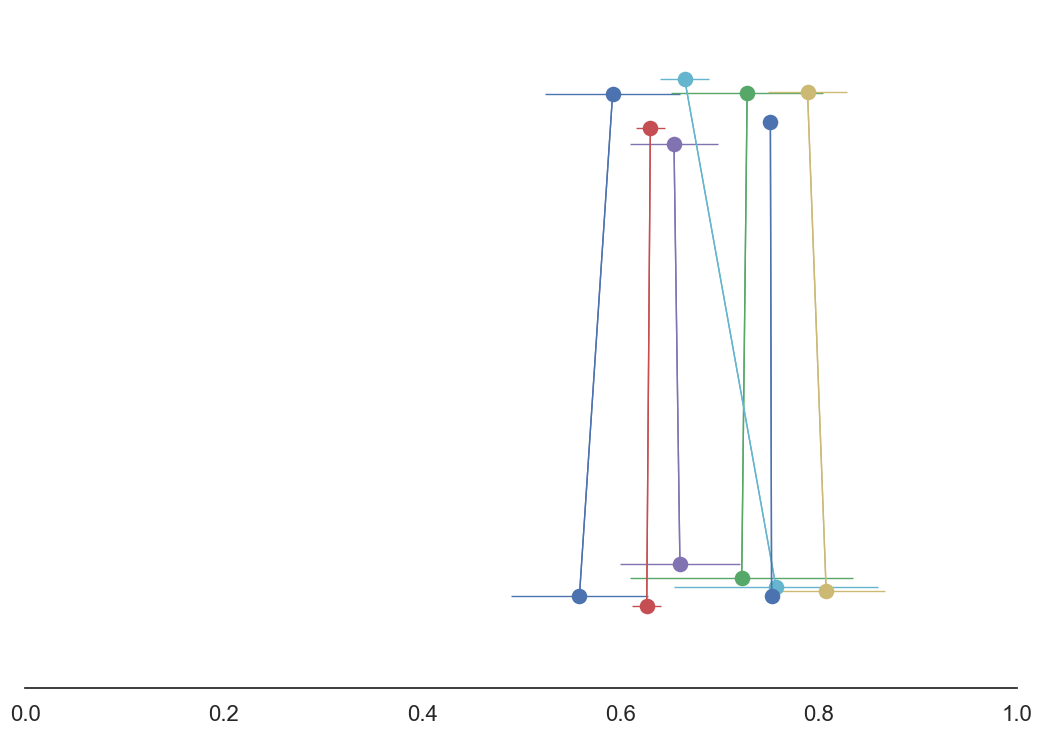

In [36]:
shrinkage_plot(resturant_food['mean'].values, food_thetas_1, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

### Probability Shrinkage plot!

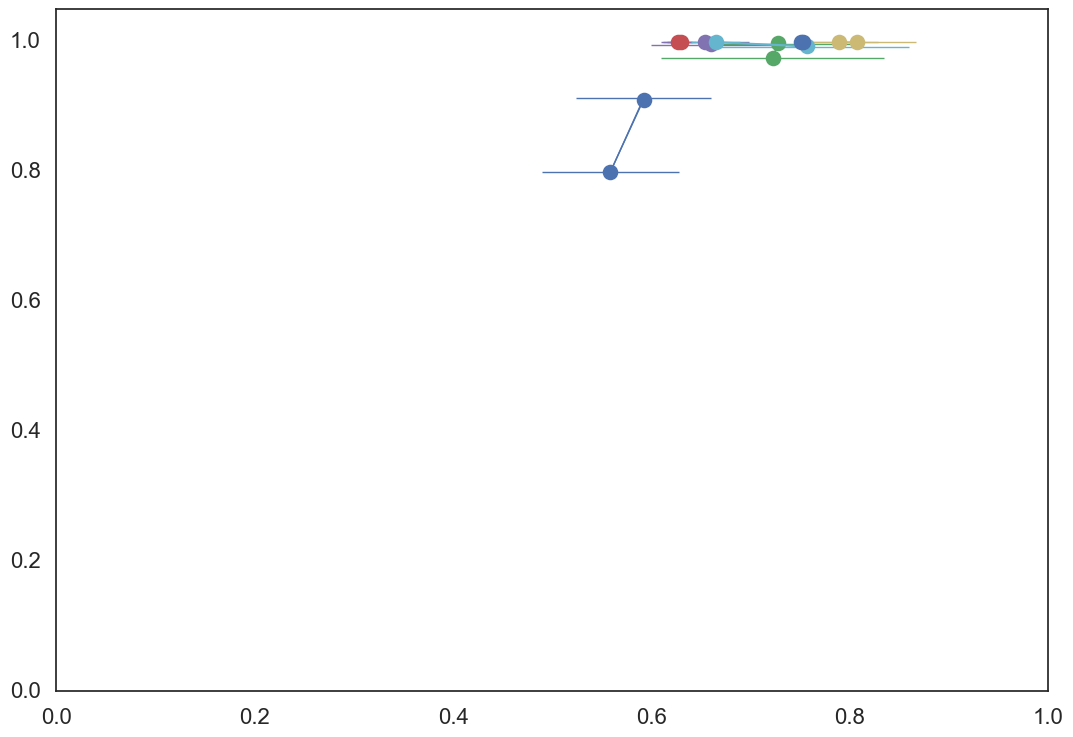

In [37]:
prob_shrinkage_plot(resturant_food['mean'].values, food_thetas_1, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

### Conclusion: shrinkage observed! (i.e. regularization happened!)

---

## Now a model for service

In [38]:
# observed data: SERVICE
y_obs = resturant_service['mean'].values
tau_obs = resturant_service['count'].values / resturant_service['var'].values 

# define priors
nu = pymc.Normal('nu', mu=0, tau=1./5)
t = pymc.HalfCauchy('tau', 0, 1./5)
theta = pymc.Normal('mu', mu=nu, tau=t, size=len(y_obs))

# define likelihood
y_bar = pymc.Normal('y_obs', mu=theta, tau=tau_obs, value=y_obs, observed=True)

# inference
m = pymc.Model([nu, t, theta, y_bar])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 1.4 sec

In [39]:
service_thetas_1 = theta.stats()['mean']
print 'service thetas:', service_thetas_1

service thetas: [ 0.57297015  0.83851437  0.69270859]


### Shrinkage plot!

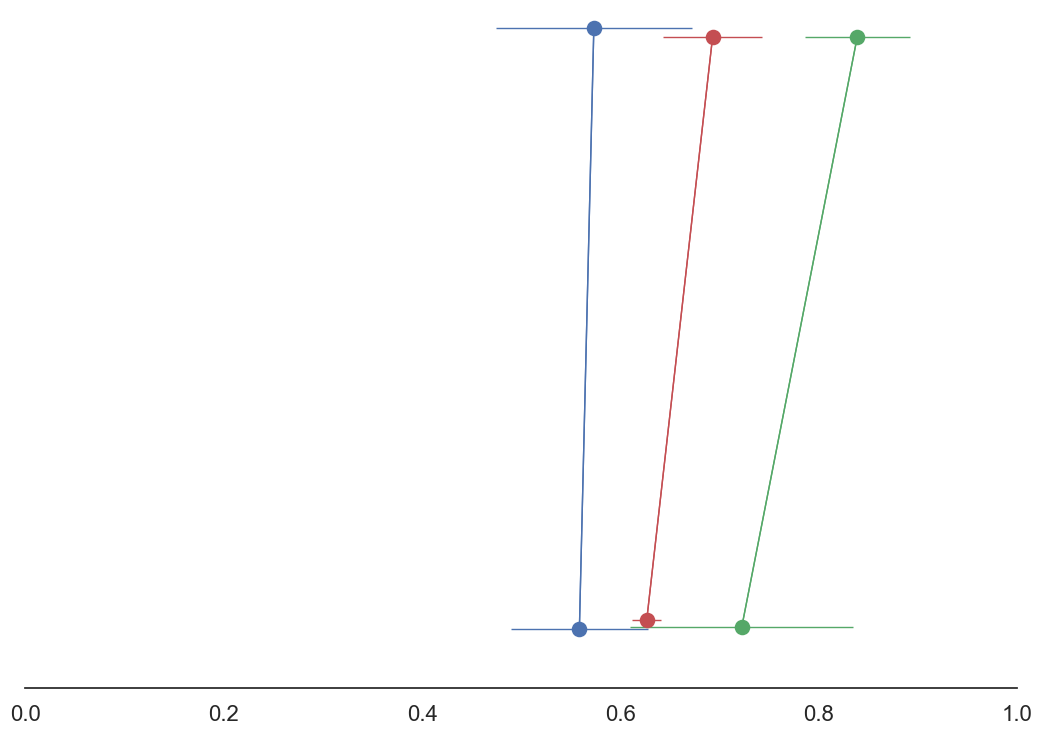

In [40]:
shrinkage_plot(resturant_food['mean'].values, service_thetas_1, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

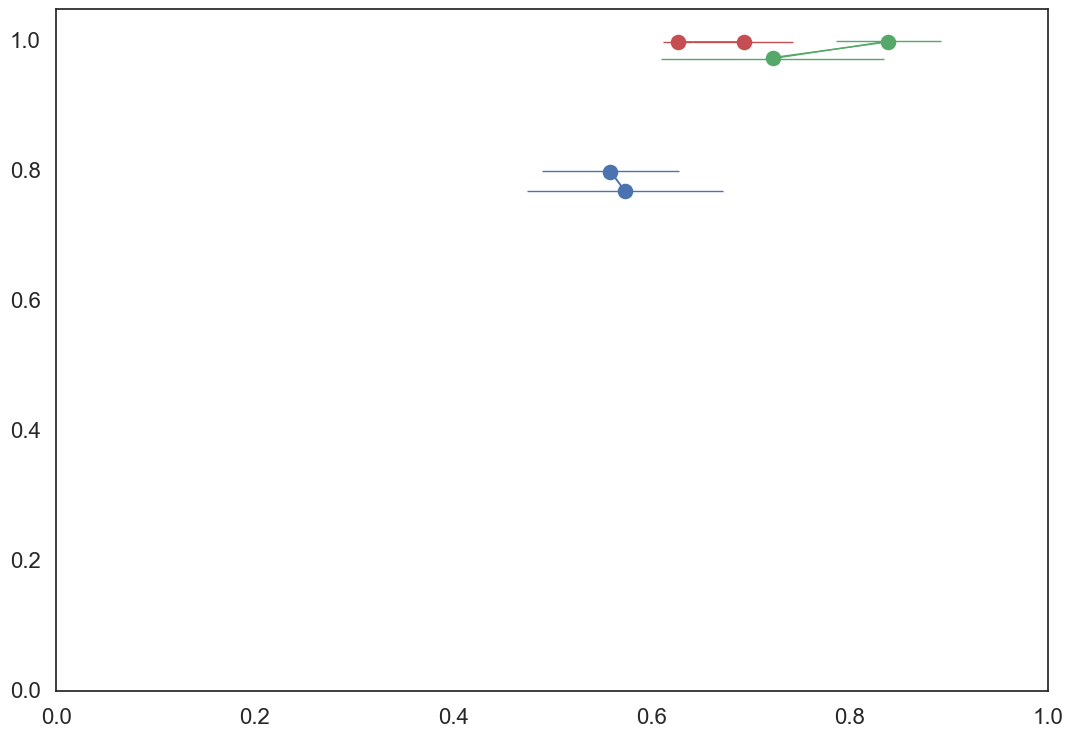

In [41]:
prob_shrinkage_plot(resturant_food['mean'].values, service_thetas_1, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

### OK shrunk again!

---

## We do this for food and service for the second restaurant

### 1. FOOD

In [26]:
resturant_food = df[(df['rid'] == '4gLecengX1JeGILm7DwU3w') & (df['topic'] == 0)]
resturant_service = df[(df['rid'] == '4gLecengX1JeGILm7DwU3w') & (df['topic'] == 1)]
resturant_food = resturant_food[resturant_food['count'] > 1]
resturant_food

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
64917,R4rFqN4UwSvoOoxz9dCxFQ,0,4gLecengX1JeGILm7DwU3w,4,0.605866,0.459443,0.331908,1,1.000000,0.013351
67054,Rzp7F68NDiUGk20dnMn2sw,0,4gLecengX1JeGILm7DwU3w,3,0.866181,0.720985,0.550064,3,4.333333,0.025479
126245,qgjAwFJhjK26GBBkh__J9w,0,4gLecengX1JeGILm7DwU3w,4,0.851957,0.517741,0.118054,5,3.625000,0.093700


In [27]:
resturant_service = resturant_service[resturant_service['count'] > 1]
resturant_service

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
44930,IRGFb0sOKq1lNwM4pRtadw,1,4gLecengX1JeGILm7DwU3w,2,0.867888,0.856819,0.845750,5,3.833333,0.000245
126246,qgjAwFJhjK26GBBkh__J9w,1,4gLecengX1JeGILm7DwU3w,7,0.816901,0.649239,0.473827,5,3.625000,0.014865
138482,vuZilH9i2v_P6h1pQEPCBw,1,4gLecengX1JeGILm7DwU3w,4,0.664799,0.464601,0.151198,2,2.000000,0.048424


 [-----------------100%-----------------] 11000 of 11000 complete in 1.5 secfood thetas: [ 0.61356625  0.70733696  0.62828207  0.66730219  0.7482556   0.70153751
  0.75030903]


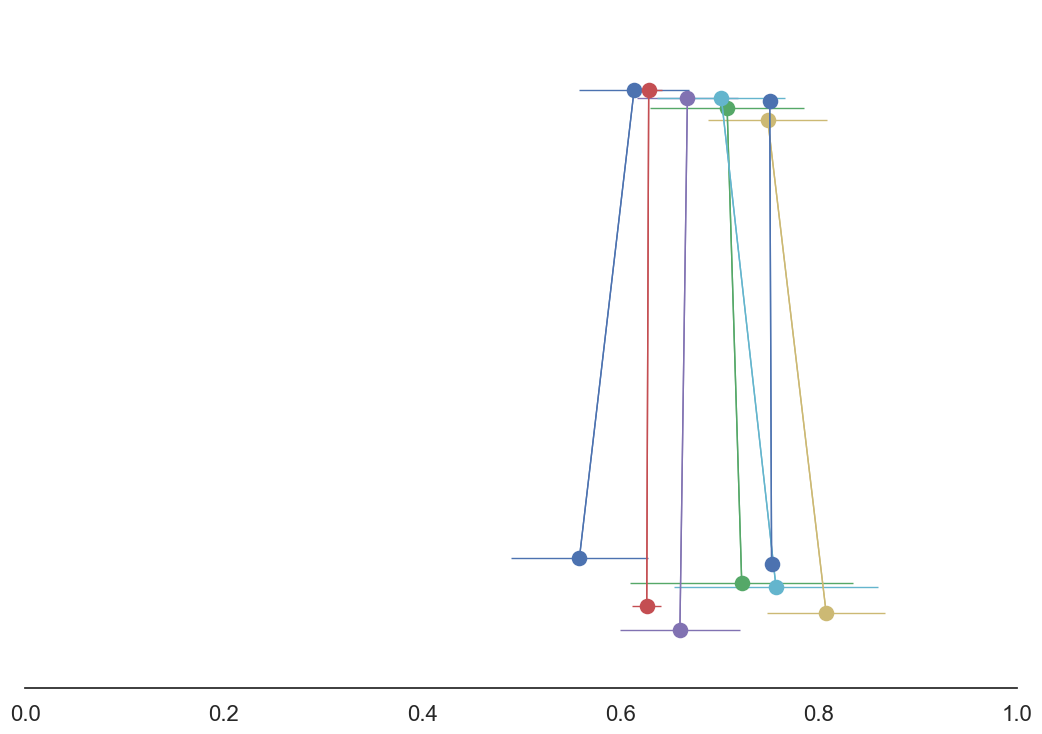

In [45]:
# observed data: FOOOODDD
y_obs = resturant_food['mean'].values
tau_obs = resturant_food['count'].values / resturant_food['var'].values 

# define priors
nu = pymc.Normal('nu', mu=0, tau=1./5)
t = pymc.HalfCauchy('tau', 0, 1./5)
theta = pymc.Normal('mu', mu=nu, tau=t, size=len(y_obs))

# define likelihood
y_bar = pymc.Normal('y_obs', mu=theta, tau=tau_obs, value=y_obs, observed=True)

# inference
m = pymc.Model([nu, t, theta, y_bar])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

food_thetas_2 = theta.stats()['mean']
print 'food thetas:', food_thetas_2

shrinkage_plot(resturant_food['mean'].values, food_thetas_2, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

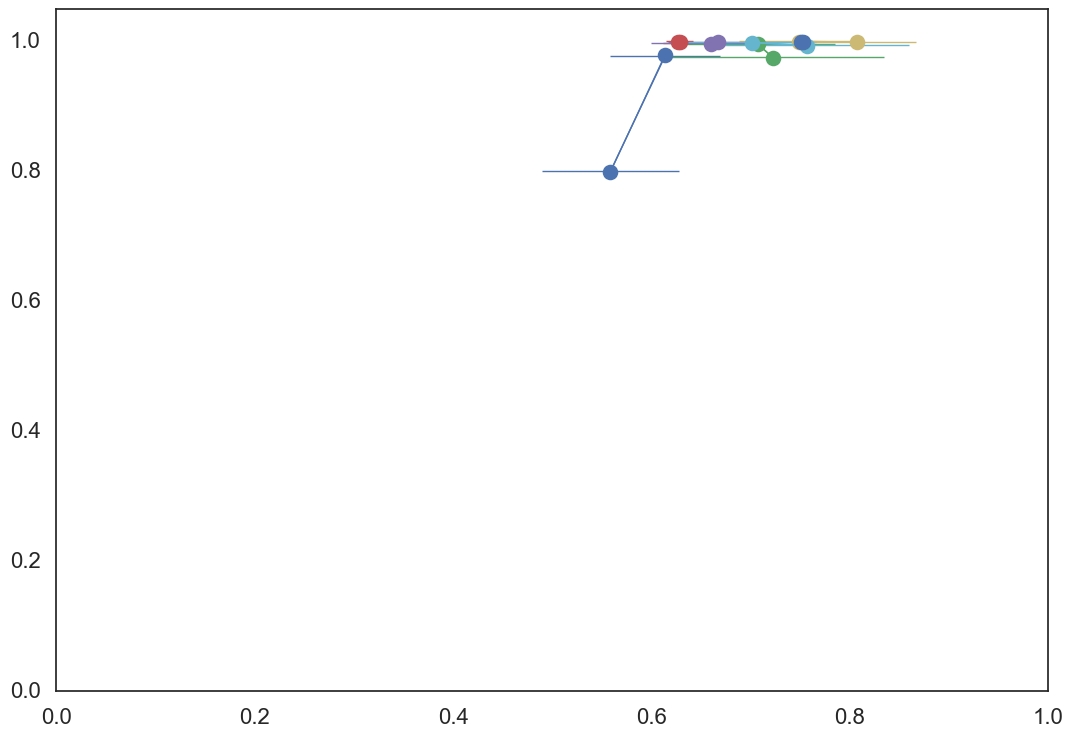

In [46]:
prob_shrinkage_plot(resturant_food['mean'].values, food_thetas_2, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

### 2. Service

 [-----------------100%-----------------] 11000 of 11000 complete in 1.6 secservice thetas: [ 0.55458674  0.83935376  0.67644414]


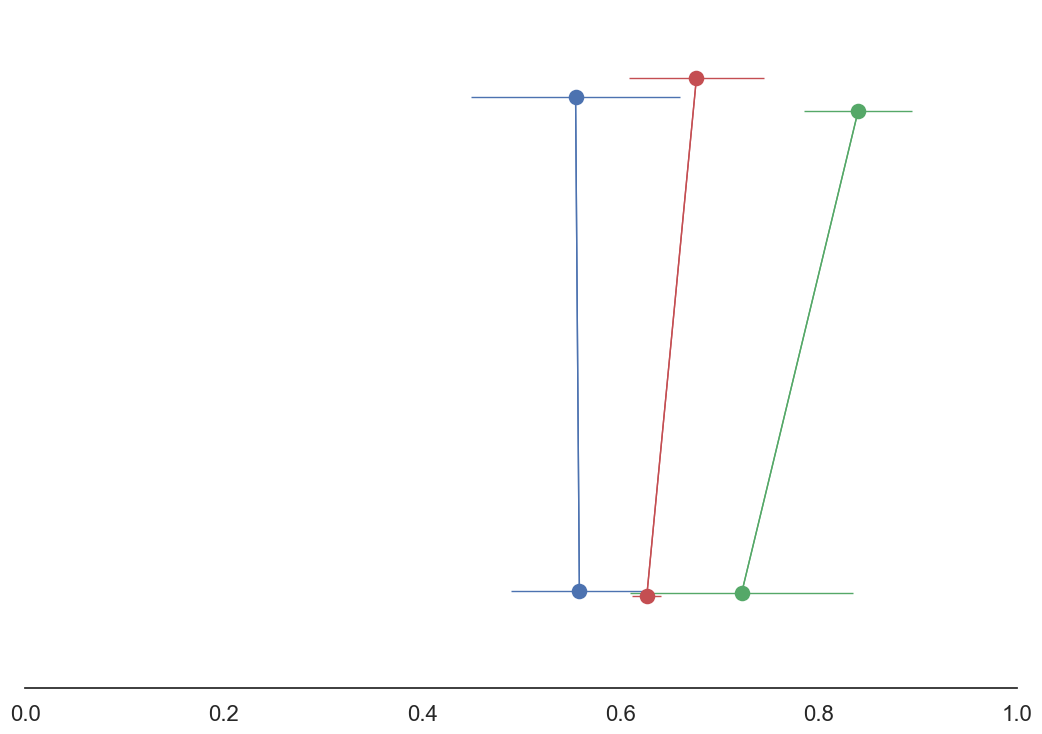

In [47]:
# observed data: SERVICE
y_obs = resturant_service['mean'].values
tau_obs = resturant_service['count'].values / resturant_service['var'].values 

# define priors
nu = pymc.Normal('nu', mu=0, tau=1./5)
t = pymc.HalfCauchy('tau', 0, 1./5)
theta = pymc.Normal('mu', mu=nu, tau=t, size=len(y_obs))

# define likelihood
y_bar = pymc.Normal('y_obs', mu=theta, tau=tau_obs, value=y_obs, observed=True)

# inference
m = pymc.Model([nu, t, theta, y_bar])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

service_thetas_2 = theta.stats()['mean']
print 'service thetas:', service_thetas_2

shrinkage_plot(resturant_food['mean'].values, service_thetas_2, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

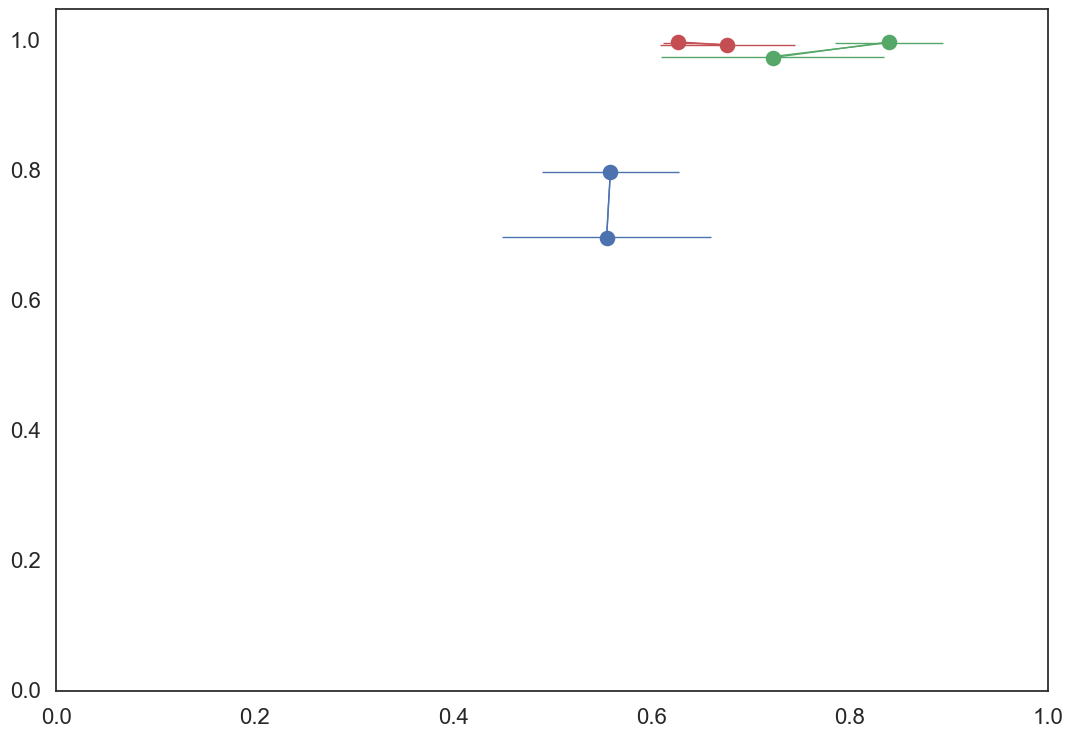

In [48]:
prob_shrinkage_plot(resturant_food['mean'].values, service_thetas_2, resturant_food['var'].values, theta.stats()['standard deviation']**2, resturant_food['count'].values)

--- 

## Ok so now we have an overall food opinion and overall service opinion for each review, we get a food score by averaging the food opinions (or you can do something fancier). The problem again is that scores for restaurants with very few reviews will be very skewed. So for extra credit you can do another hierachical model for pooling, for example.